# 해외직접구매액은 해가 지날수록 증가했을까?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [4]:
from IPython.display import set_matplotlib_formats

In [5]:
set_matplotlib_formats('retina')

In [43]:
df_raw = pd.read_csv('data/국가_대륙_별_상품군별_온라인쇼핑_해외직접구매액_20200516144351.csv', encoding='cp949')
df_raw.shape

(150, 27)

In [44]:
df_raw.head()

,국가(대륙)별,상품군별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,...,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4
0,합계,합계,378879,382844,375879,509530,422330,392028,389071,497955,...,662011,692111,687218,695752,896621,905483,889921,842000,998645,979275
1,합계,컴퓨터 및 주변기기,7857,7232,8767,12159,11401,10575,8149,13115,...,13941,12527,12543,11321,17197,13180,10493,9408,17055,12347
2,합계,가전·전자·통신기기,18924,18173,23375,42605,31703,28755,29152,50393,...,107531,102167,98533,98704,151967,141787,111914,97834,111482,90801
3,합계,소프트웨어,905,949,899,1250,1254,1018,1171,1472,...,3109,2863,2665,2665,3045,3107,2975,3324,3486,3191
4,합계,서 적,2954,2345,2746,2827,3367,3163,3424,4094,...,5489,5490,4811,5474,5570,5704,5546,5213,5912,6480


## 데이터 전처리

### 결측치 처리

In [45]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   국가(대륙)별   150 non-null    object
 1   상품군별      150 non-null    object
 2   2014 1/4  150 non-null    object
 3   2014 2/4  150 non-null    object
 4   2014 3/4  150 non-null    object
 5   2014 4/4  150 non-null    object
 6   2015 1/4  150 non-null    object
 7   2015 2/4  150 non-null    object
 8   2015 3/4  150 non-null    object
 9   2015 4/4  150 non-null    object
 10  2016 1/4  150 non-null    object
 11  2016 2/4  150 non-null    object
 12  2016 3/4  150 non-null    object
 13  2016 4/4  150 non-null    object
 14  2017 1/4  150 non-null    object
 15  2017 2/4  150 non-null    object
 16  2017 3/4  150 non-null    object
 17  2017 4/4  150 non-null    object
 18  2018 1/4  150 non-null    object
 19  2018 2/4  150 non-null    object
 20  2018 3/4  150 non-null    object
 21  2018 4/4  150 no

In [46]:
df_raw.isnull().sum()
# 결측치 없음

국가(대륙)별     0
상품군별        0
2014 1/4    0
2014 2/4    0
2014 3/4    0
2014 4/4    0
2015 1/4    0
2015 2/4    0
2015 3/4    0
2015 4/4    0
2016 1/4    0
2016 2/4    0
2016 3/4    0
2016 4/4    0
2017 1/4    0
2017 2/4    0
2017 3/4    0
2017 4/4    0
2018 1/4    0
2018 2/4    0
2018 3/4    0
2018 4/4    0
2019 1/4    0
2019 2/4    0
2019 3/4    0
2019 4/4    0
2020 1/4    0
dtype: int64

### tidy data 만들기

In [47]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '2014 1/4', '2014 2/4', '2014 3/4', '2014 4/4',
       '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4', '2016 2/4',
       '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4', '2017 4/4',
       '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4', '2019 2/4',
       '2019 3/4', '2019 4/4', '2020 1/4'],
      dtype='object')

In [64]:
df = df_raw.melt(id_vars=['국가(대륙)별', '상품군별'], var_name='기간', value_name='구매액(백만원)')

### 기간에서 연도와 분기 떼어내기

In [65]:
df['기간']

0       2014 1/4
1       2014 1/4
2       2014 1/4
3       2014 1/4
4       2014 1/4
          ...   
3745    2020 1/4
3746    2020 1/4
3747    2020 1/4
3748    2020 1/4
3749    2020 1/4
Name: 기간, Length: 3750, dtype: object

In [66]:
'2014 1/4'.split()[0]

'2014'

In [67]:
df['연도'] = df['기간'].map(lambda x: int(x.split()[0]))

In [68]:
df['분기'] = df['기간'].map(lambda x: int(x.split()[1].split('/')[0]))

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   국가(대륙)별   3750 non-null   object
 1   상품군별      3750 non-null   object
 2   기간        3750 non-null   object
 3   구매액(백만원)  3750 non-null   object
 4   연도        3750 non-null   int64 
 5   분기        3750 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 175.9+ KB


In [78]:
df['구매액(백만원)'] = df['구매액(백만원)'].replace('-', pd.np.nan).astype('float')

C:\Users\asdfa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [79]:
df.head(30)

,국가(대륙)별,상품군별,기간,구매액(백만원),연도,분기,판매액(백만원)
0,합계,합계,2014 1/4,378879.0,2014,1,378879.0
1,합계,컴퓨터 및 주변기기,2014 1/4,7857.0,2014,1,7857.0
2,합계,가전·전자·통신기기,2014 1/4,18924.0,2014,1,18924.0
3,합계,소프트웨어,2014 1/4,905.0,2014,1,905.0
4,합계,서 적,2014 1/4,2954.0,2014,1,2954.0
5,합계,사무·문구,2014 1/4,1423.0,2014,1,1423.0
6,합계,음반·비디오·악기,2014 1/4,1927.0,2014,1,1927.0
7,합계,의류 및 패션관련 상품,2014 1/4,174202.0,2014,1,174202.0
8,합계,스포츠·레저용품,2014 1/4,4914.0,2014,1,4914.0
9,합계,화장품,2014 1/4,26957.0,2014,1,26957.0


In [80]:
df['국가(대륙)별'].value_counts()

대양주           375
중국            375
중남미           375
기타            375
아세안(ASEAN)    375
중동            375
EU            375
미국            375
일본            375
합계            375
Name: 국가(대륙)별, dtype: int64

In [81]:
result_asproduct = df.pivot_table(index='상품군별', columns='연도', values='구매액(백만원)', aggfunc='sum')

## 시각화하기

### 상품군별 합계금액 연도별 추이

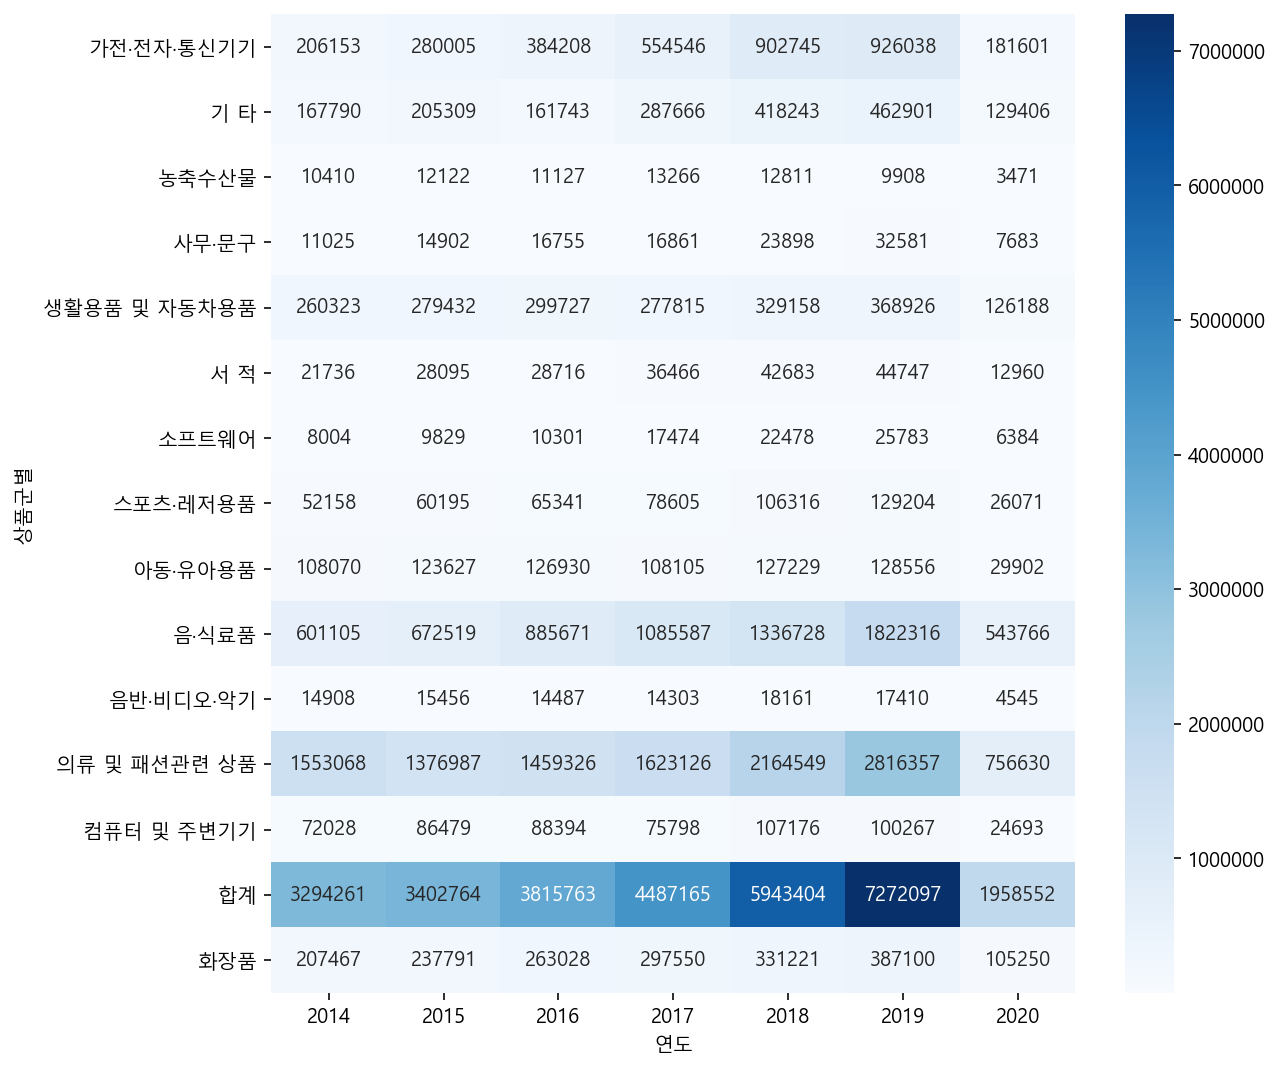

In [82]:
plt.figure(figsize=(9,9))
sns.heatmap(data=result_asproduct, cmap="Blues", annot=True, fmt='.0f')
# 합계를 보면 갈수록 온라인직접구매액이 늘어나고 있음을 알 수 있다.

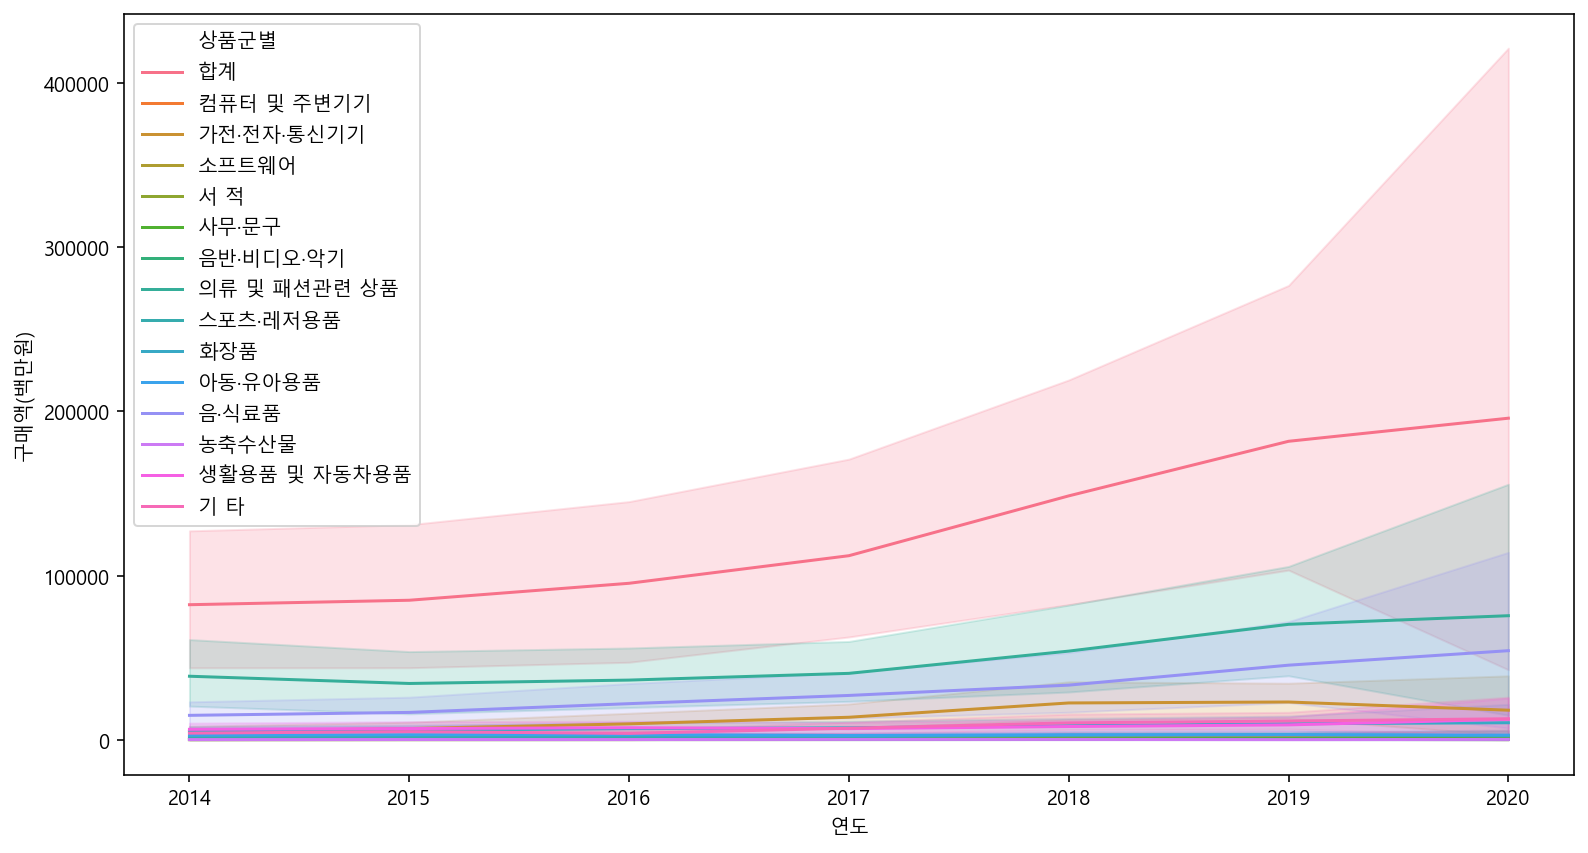

In [84]:
plt.figure(figsize=(13,7))
sns.lineplot(data=df, x='연도', y='구매액(백만원)',
            hue='상품군별')

### 합계금액 제외

In [86]:
df_nototal = df[~df['상품군별'].isin(['합계'])]

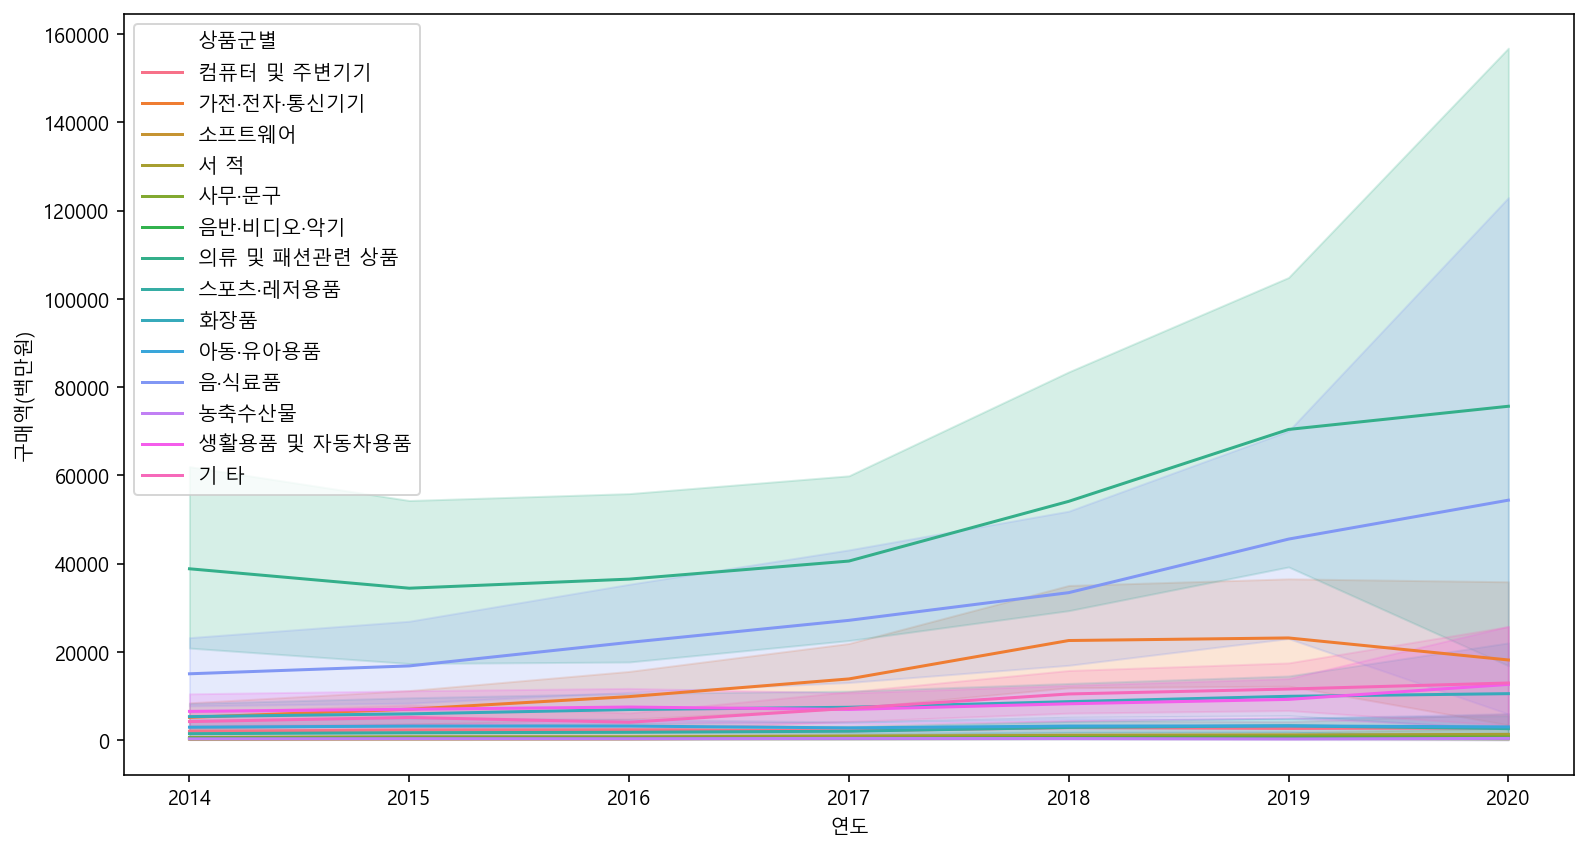

In [87]:
plt.figure(figsize=(13,7))
sns.lineplot(data=df_nototal, x='연도', y='구매액(백만원)',
            hue='상품군별')

<Figure size 432x432 with 0 Axes>

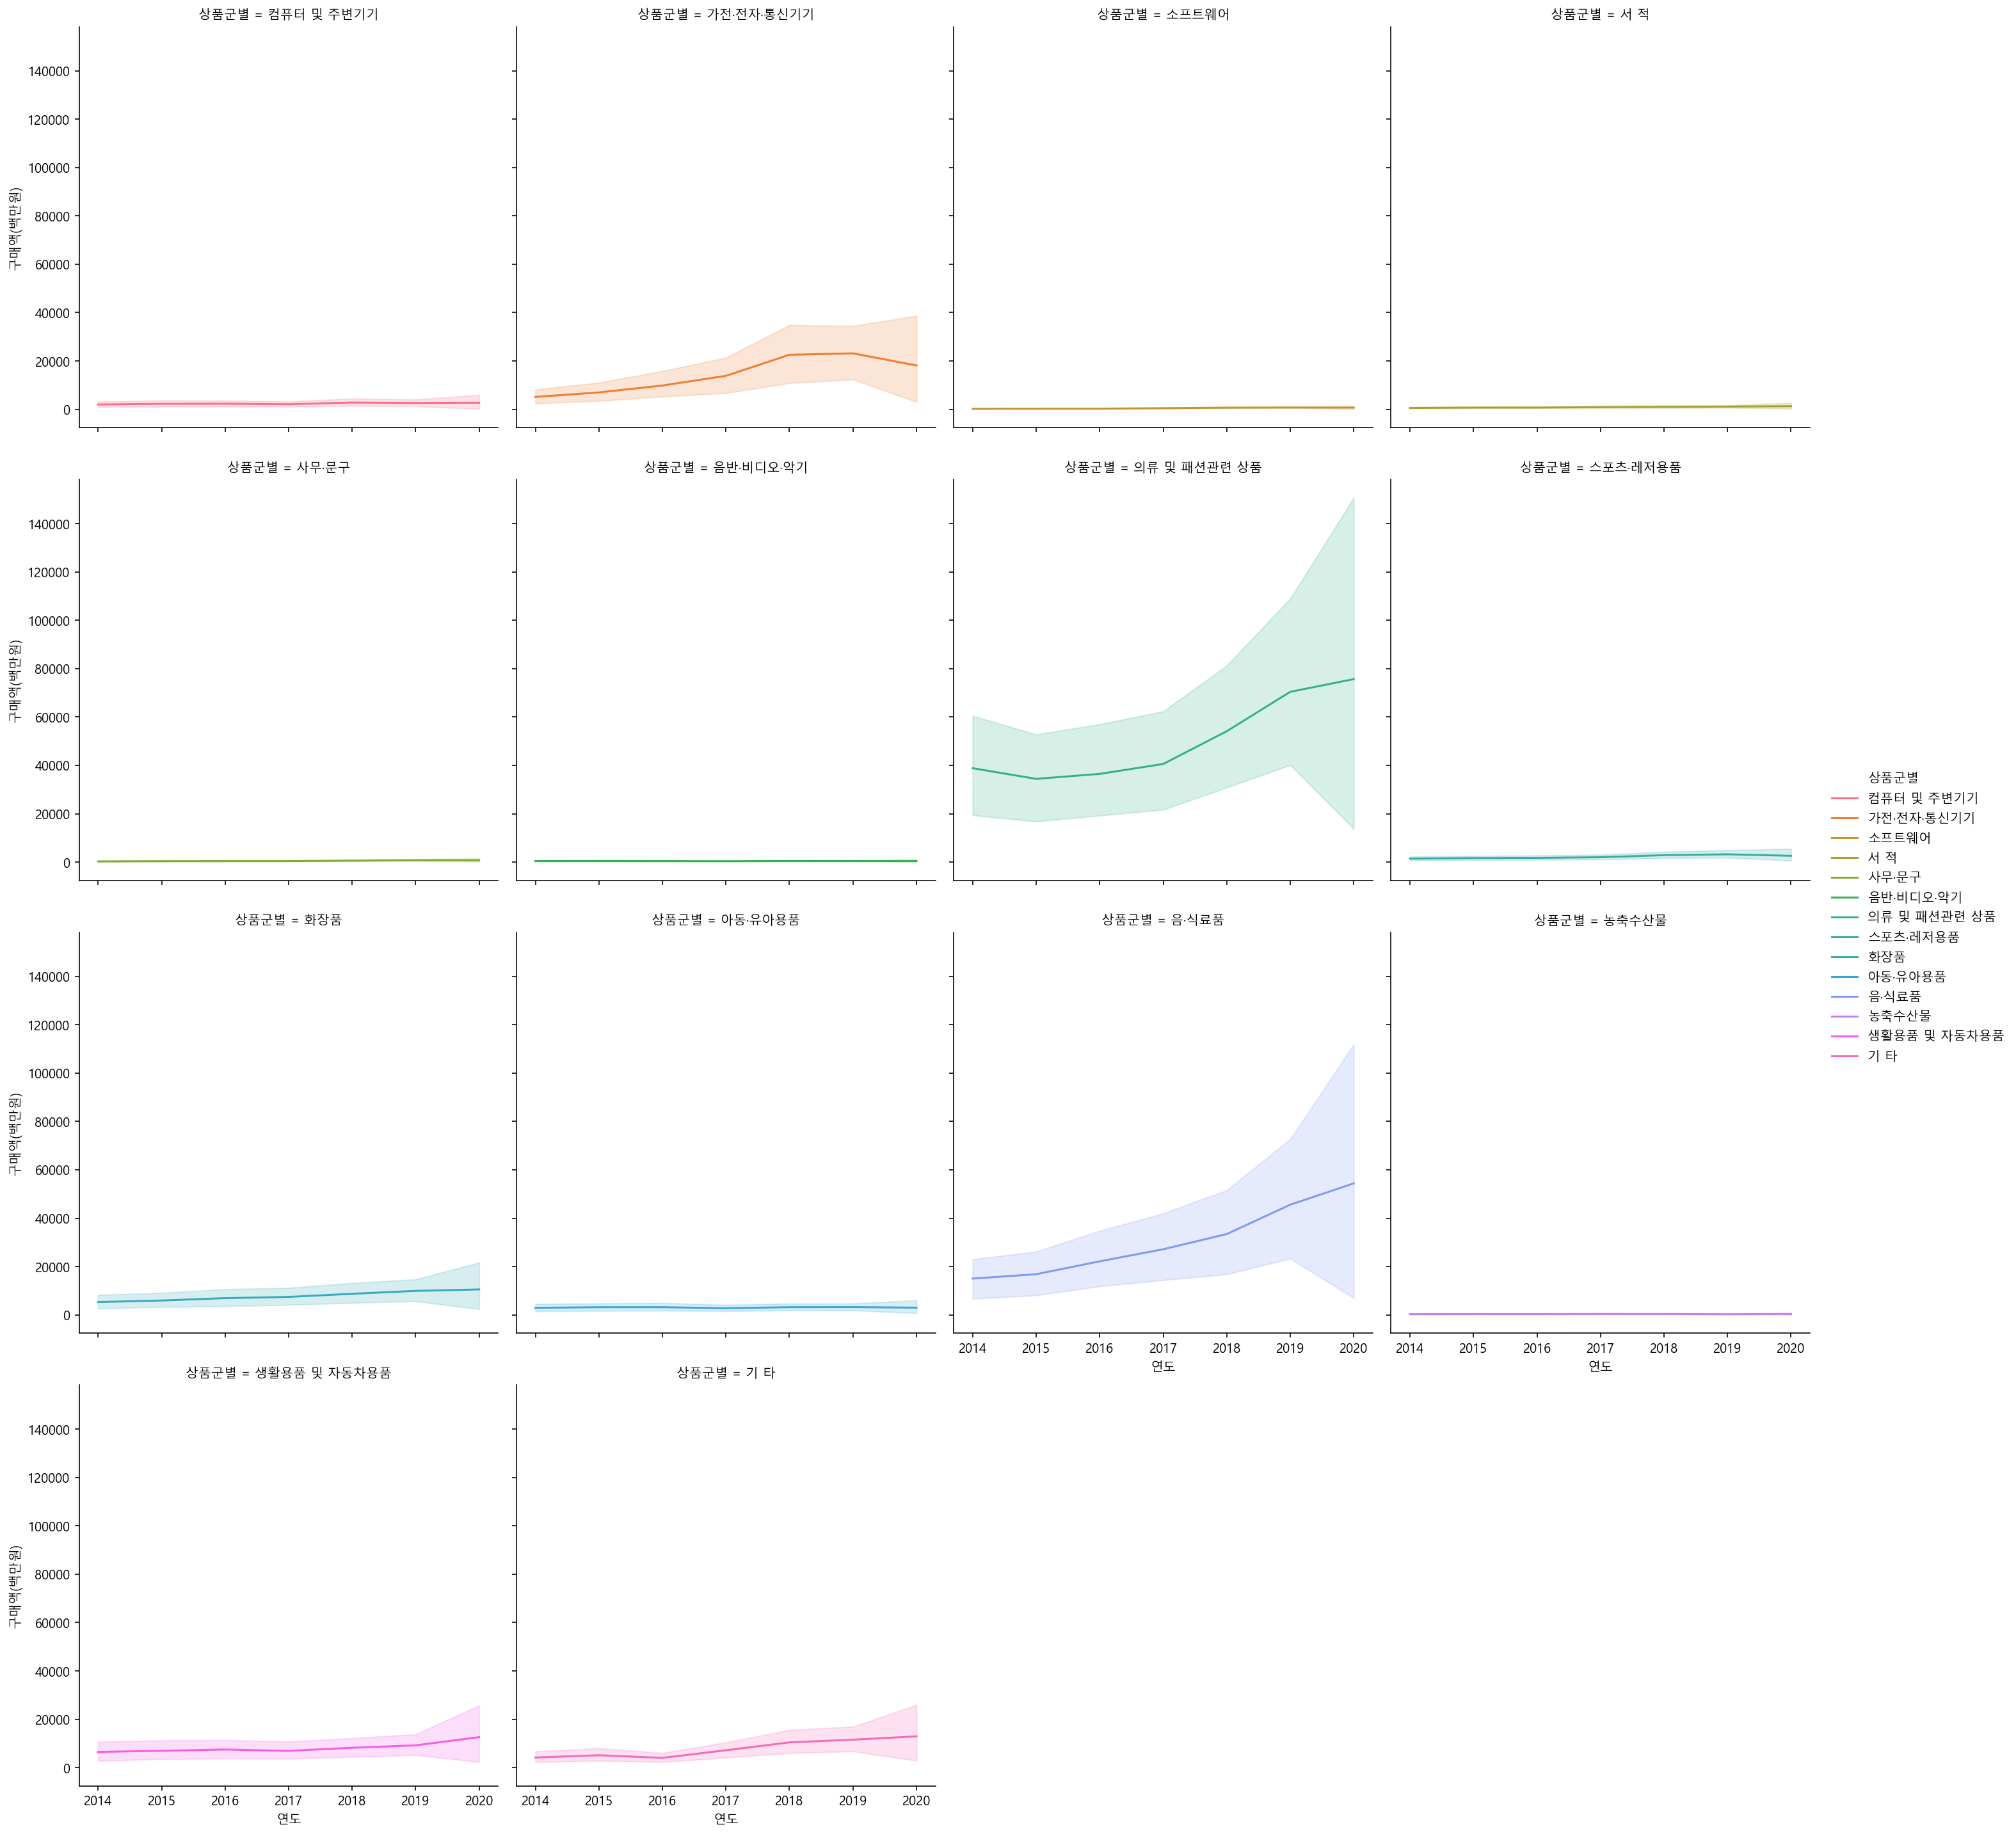

In [91]:
plt.figure(figsize=(6,6))
sns.relplot(data=df_nototal, x='연도', y='구매액(백만원)',
            hue='상품군별', kind='line', col='상품군별', col_wrap=4)
# 패션관련 상품과 식료품 구매액이 높은 편이다

In [95]:
result_ascountry = df.pivot_table(index='국가(대륙)별', columns='연도', values='구매액(백만원)', aggfunc='sum')

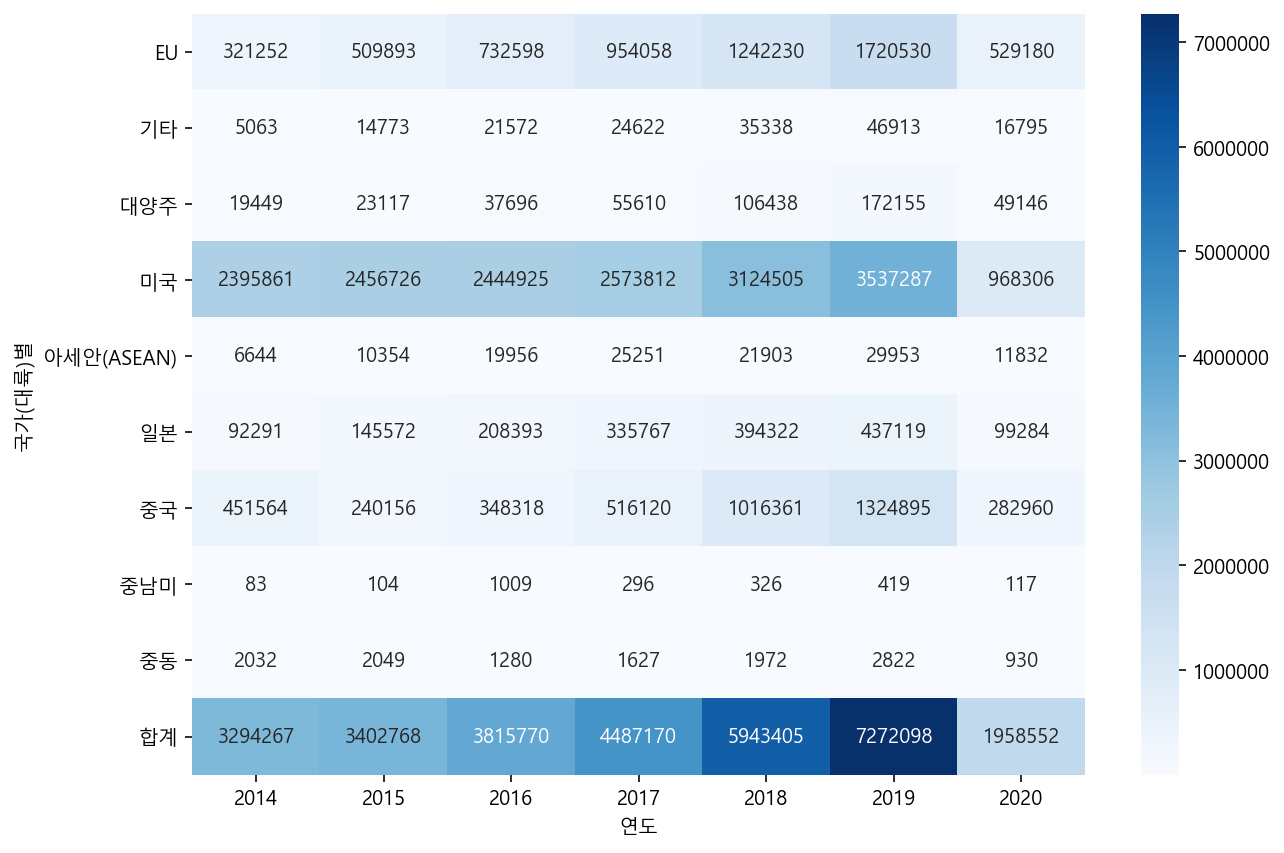

In [97]:
plt.figure(figsize=(10,7))
sns.heatmap(data=result_ascountry, cmap='Blues', annot=True, fmt='.0f')
## 온라인직접 구매액은 미국이 압도적이다.